In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 90
#pd.options.display.max_rows = 100

In [2]:
df = pd.read_csv('/kaggle/input/spam-email-dataset/spam_email_dataset.csv')
df.head(2)

,Email,Subject,Sender,Recipient,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,gregorysmith@example.org,13-02-2023,04:13,3,0,191,32,3,3,0,11,1,1
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,gonzalezdaniel@example.net,09-08-2023,06:15,3,9,45,1,2,1,2,8,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Email              6000 non-null   object
 1   Subject            6000 non-null   object
 2   Sender             6000 non-null   object
 3   Recipient          6000 non-null   object
 4   Date               6000 non-null   object
 5   Time               6000 non-null   object
 6   Attachments        6000 non-null   int64 
 7   Link Count         6000 non-null   int64 
 8   Word Count         6000 non-null   int64 
 9   Uppercase Count    6000 non-null   int64 
 10  Exclamation Count  6000 non-null   int64 
 11  Question Count     6000 non-null   int64 
 12  Dollar Count       6000 non-null   int64 
 13  Punctuation Count  6000 non-null   int64 
 14  HTML Tags Count    6000 non-null   int64 
 15  Spam Indicator     6000 non-null   int64 
dtypes: int64(10), object(6)
memory usage: 750.

In [4]:
df.describe()

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,1.497833,5.005500,153.269500,75.997667,2.481833,1.486000,0.989500,7.549667,2.528833,0.497000
std,1.125555,3.166092,83.135747,64.735568,1.717895,1.118785,0.812301,4.624619,1.703522,0.500033
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,83.000000,23.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,1.000000,5.000000,154.000000,59.000000,2.000000,1.000000,1.000000,8.000000,3.000000,0.000000
75%,3.000000,8.000000,223.000000,114.000000,4.000000,2.000000,2.000000,12.000000,4.000000,1.000000
max,3.000000,10.000000,300.000000,300.000000,5.000000,3.000000,2.000000,15.000000,5.000000,1.000000


In [5]:
df.describe(include = 'O')

,Email,Subject,Sender,Recipient,Date,Time
count,6000,6000,6000,6000,6000,6000
unique,5921,6000,5914,5926,234,1418
top,rmoore@example.net,Even hotel community church.,john58@example.org,bsmith@example.org,14-06-2023,20:29
freq,3,1,3,3,44,12


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Email                0
Subject              0
Sender               0
Recipient            0
Date                 0
Time                 0
Attachments          0
Link Count           0
Word Count           0
Uppercase Count      0
Exclamation Count    0
Question Count       0
Dollar Count         0
Punctuation Count    0
HTML Tags Count      0
Spam Indicator       0
dtype: int64

In [8]:
df.nunique()

Email                5921
Subject              6000
Sender               5914
Recipient            5926
Date                  234
Time                 1418
Attachments             4
Link Count             11
Word Count            291
Uppercase Count       284
Exclamation Count       6
Question Count          4
Dollar Count            3
Punctuation Count      16
HTML Tags Count         6
Spam Indicator          2
dtype: int64

> **Clear some useless columns ******

In [9]:
df.drop(['Email','Recipient'],axis = 1,inplace = True)

In [10]:
df

,Subject,Sender,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,Even hotel community church.,emilyscott@example.org,13-02-2023,04:13,3,0,191,32,3,3,0,11,1,1
1,Try themselves guess fight white agreement thu...,annwhite@example.net,09-08-2023,06:15,3,9,45,1,2,1,2,8,2,1
2,Environmental commercial off seem any conference.,david88@example.net,16-05-2023,01:32,3,9,52,1,4,0,2,10,1,1
3,Smile real TV father commercial day increase.,lindaalvarez@example.com,25-04-2023,14:50,2,3,75,6,0,2,0,8,2,0
4,Fast stage he oil institution.,vstafford@example.com,11-07-2023,21:44,3,5,299,279,0,2,0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Current team yet like realize American.,martinezangela@example.net,10-04-2023,07:18,1,7,114,83,0,3,2,0,5,0
5996,Also start certainly range great try others.,mckenzieerika@example.net,07-05-2023,19:45,1,5,19,10,0,0,1,7,0,0
5997,Matter issue win agent likely.,dlewis@example.org,08-04-2023,18:49,2,10,52,45,5,3,0,10,4,0
5998,Again member father.,eperry@example.org,19-01-2023,14:00,3,2,178,76,0,1,2,11,1,1


> **As you can't use time column so we have to transform to some other form so that it make some sense**

In [11]:
#Convert date column to date time format
df['Date'] = pd.to_datetime(df['Date'])

# accessing the month from the date column
df['Month'] = df['Date'].dt.month

# accessing the year from the date column

df['date'] = df['Date'].dt.day

#Convert time column to date time format

# df['Time'] = pd.to_datetime(df['Time'])

# # accessing the hour from the date column

# df['hour'] = df['Time'].dt.hour

# #No drop the time and date column

df.drop(['Time','Date'],axis = 1,inplace = True)

In [12]:
df.head(2)

,Subject,Sender,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator,Month,date
0,Even hotel community church.,emilyscott@example.org,3,0,191,32,3,3,0,11,1,1,2,13
1,Try themselves guess fight white agreement thu...,annwhite@example.net,3,9,45,1,2,1,2,8,2,1,8,9


In [13]:
df.isnull().sum()

Subject              0
Sender               0
Attachments          0
Link Count           0
Word Count           0
Uppercase Count      0
Exclamation Count    0
Question Count       0
Dollar Count         0
Punctuation Count    0
HTML Tags Count      0
Spam Indicator       0
Month                0
date                 0
dtype: int64

In [14]:
df.nunique()

Subject              6000
Sender               5914
Attachments             4
Link Count             11
Word Count            291
Uppercase Count       284
Exclamation Count       6
Question Count          4
Dollar Count            3
Punctuation Count      16
HTML Tags Count         6
Spam Indicator          2
Month                   8
date                   31
dtype: int64

In [15]:
 x  = df.select_dtypes(exclude = 'O').corr()

<Axes: >

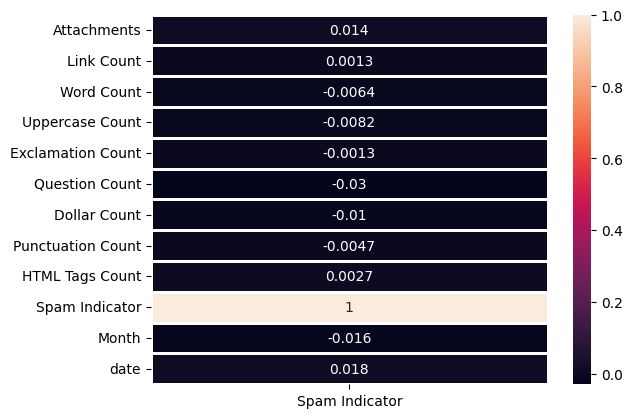

In [16]:
sns.heatmap(x['Spam Indicator'].to_frame(),cbar = 'Greens',linewidths = 2,annot = True)

<Axes: >

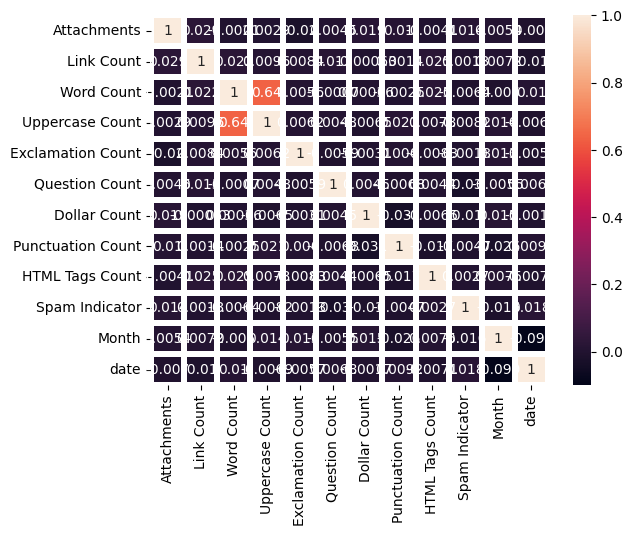

In [17]:
sns.heatmap(df.select_dtypes(exclude = 'O').corr(),cbar = 'Greens',linewidths = 4,annot = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Subject            6000 non-null   object
 1   Sender             6000 non-null   object
 2   Attachments        6000 non-null   int64 
 3   Link Count         6000 non-null   int64 
 4   Word Count         6000 non-null   int64 
 5   Uppercase Count    6000 non-null   int64 
 6   Exclamation Count  6000 non-null   int64 
 7   Question Count     6000 non-null   int64 
 8   Dollar Count       6000 non-null   int64 
 9   Punctuation Count  6000 non-null   int64 
 10  HTML Tags Count    6000 non-null   int64 
 11  Spam Indicator     6000 non-null   int64 
 12  Month              6000 non-null   int32 
 13  date               6000 non-null   int32 
dtypes: int32(2), int64(10), object(2)
memory usage: 609.5+ KB


In [19]:
z = df.select_dtypes(exclude = 'O').columns
for i in z:
    df[i] = df[i].astype('str')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Subject            6000 non-null   object
 1   Sender             6000 non-null   object
 2   Attachments        6000 non-null   object
 3   Link Count         6000 non-null   object
 4   Word Count         6000 non-null   object
 5   Uppercase Count    6000 non-null   object
 6   Exclamation Count  6000 non-null   object
 7   Question Count     6000 non-null   object
 8   Dollar Count       6000 non-null   object
 9   Punctuation Count  6000 non-null   object
 10  HTML Tags Count    6000 non-null   object
 11  Spam Indicator     6000 non-null   object
 12  Month              6000 non-null   object
 13  date               6000 non-null   object
dtypes: object(14)
memory usage: 656.4+ KB


# EDA

<Axes: xlabel='Month', ylabel='count'>

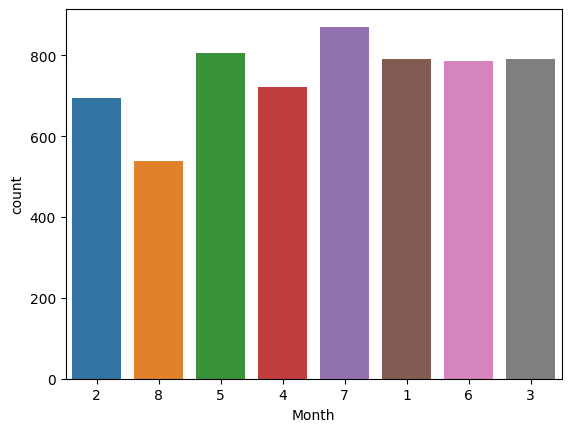

In [21]:
sns.countplot(x ='Month',data = df )

<Axes: xlabel='Month', ylabel='count'>

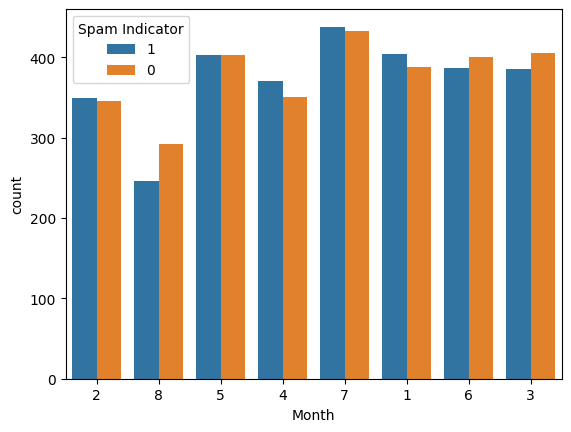

In [22]:
sns.countplot(x ='Month',data = df,hue = 'Spam Indicator' )

<Axes: xlabel='HTML Tags Count', ylabel='count'>

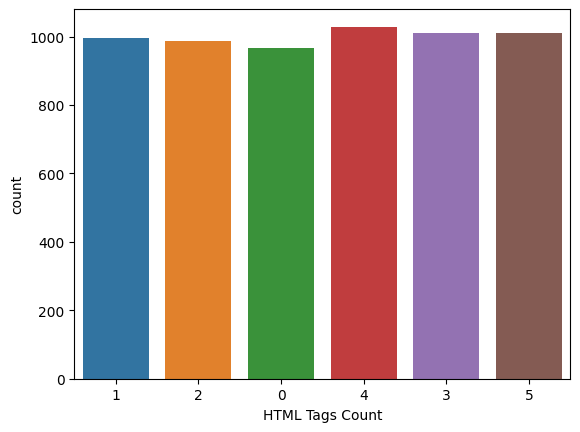

In [23]:
sns.countplot(x ='HTML Tags Count',data = df, )

<Axes: xlabel='HTML Tags Count', ylabel='count'>

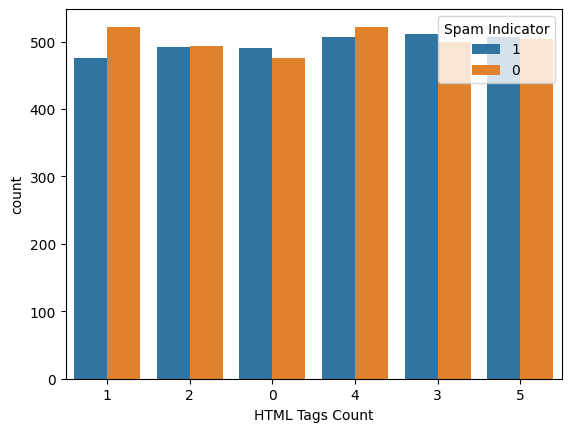

In [24]:
sns.countplot(x ='HTML Tags Count',data = df,hue = 'Spam Indicator' )

<Axes: xlabel='date', ylabel='count'>

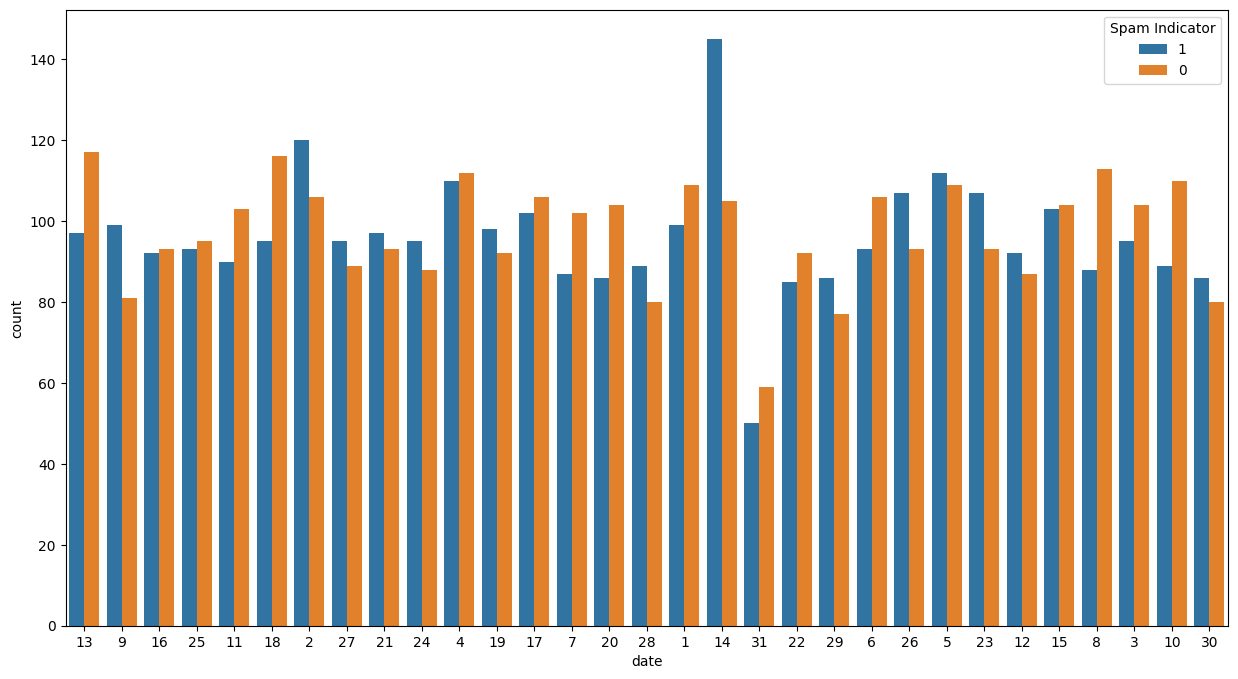

In [25]:
plt.figure(figsize = (15,8))
sns.countplot(x ='date',data = df,hue = 'Spam Indicator' )

In [26]:
df.columns

Index(['Subject', 'Sender', 'Attachments', 'Link Count', 'Word Count',
       'Uppercase Count', 'Exclamation Count', 'Question Count',
       'Dollar Count', 'Punctuation Count', 'HTML Tags Count',
       'Spam Indicator', 'Month', 'date'],
      dtype='object')

<Axes: xlabel='Punctuation Count', ylabel='count'>

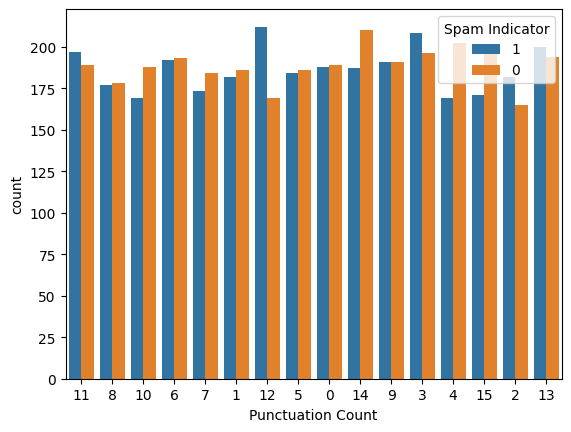

In [27]:
sns.countplot(x ='Punctuation Count',data = df,hue = 'Spam Indicator' )

<Axes: xlabel='Exclamation Count', ylabel='count'>

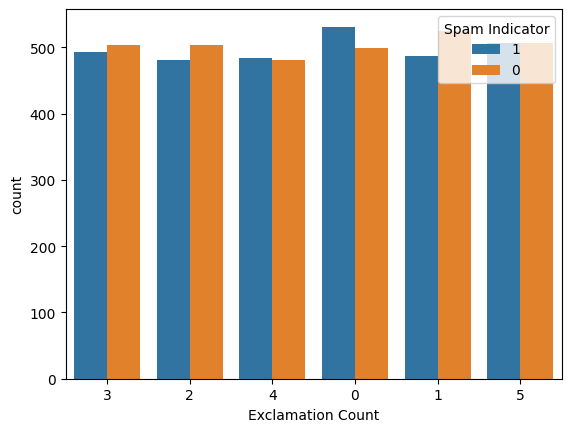

In [28]:
sns.countplot(x ='Exclamation Count',data = df,hue = 'Spam Indicator' )

<Axes: xlabel='Question Count', ylabel='count'>

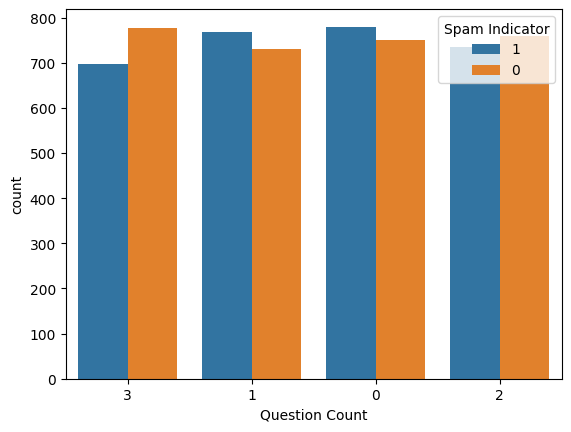

In [29]:
sns.countplot(x ='Question Count',data = df,hue = 'Spam Indicator' )

<Axes: xlabel='Dollar Count', ylabel='count'>

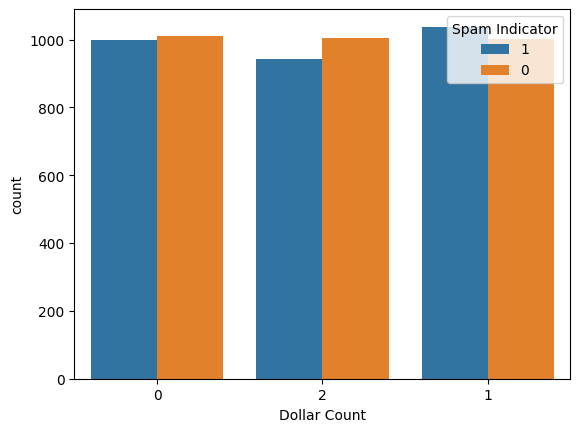

In [30]:
sns.countplot(x ='Dollar Count',data = df,hue = 'Spam Indicator' )

In [31]:
df.columns

Index(['Subject', 'Sender', 'Attachments', 'Link Count', 'Word Count',
       'Uppercase Count', 'Exclamation Count', 'Question Count',
       'Dollar Count', 'Punctuation Count', 'HTML Tags Count',
       'Spam Indicator', 'Month', 'date'],
      dtype='object')

In [32]:
df['Uppercase Count'] = df['Uppercase Count'].astype('int')
df['Word Count'] = df['Word Count'].astype('int')

<Axes: xlabel='Word Count', ylabel='Count'>

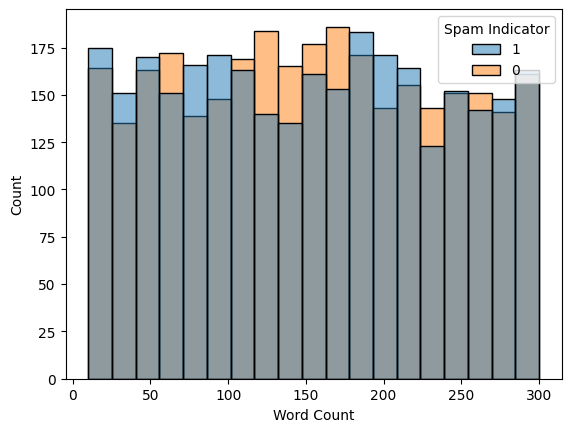

In [33]:
sns.histplot(x ='Word Count',data = df,hue = 'Spam Indicator' )

<Axes: xlabel='Word Count', ylabel='Density'>

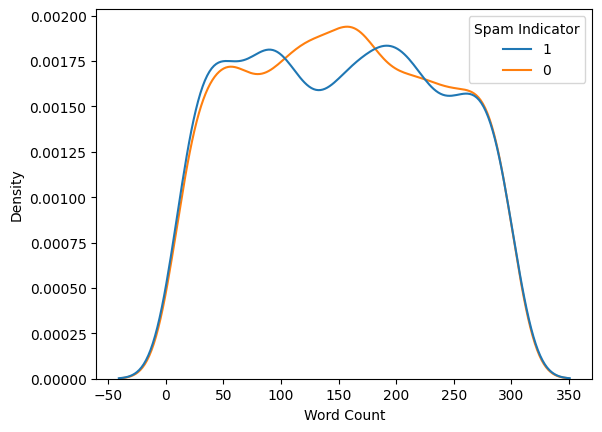

In [34]:
sns.kdeplot(x ='Word Count',data = df,hue = 'Spam Indicator' )

<Axes: xlabel='Uppercase Count', ylabel='Count'>

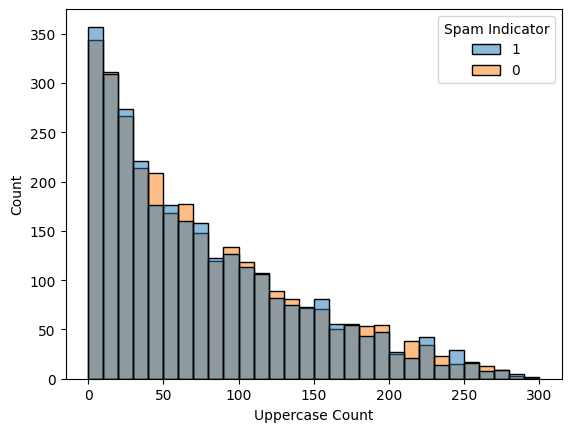

In [35]:
sns.histplot(x ='Uppercase Count',data = df,hue = 'Spam Indicator' )

<Axes: xlabel='Uppercase Count', ylabel='Density'>

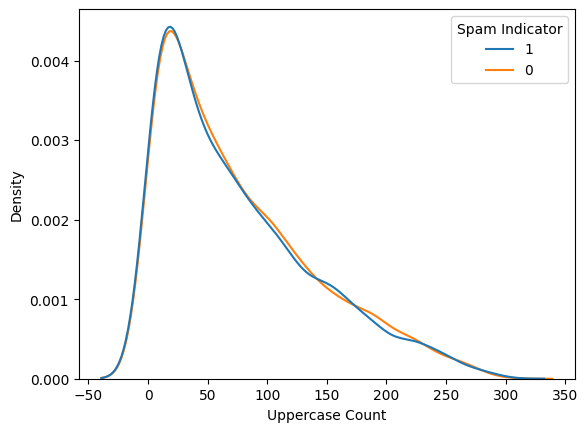

In [36]:
sns.kdeplot(x ='Uppercase Count',data = df,hue = 'Spam Indicator' )

<Axes: xlabel='Spam Indicator', ylabel='Uppercase Count'>

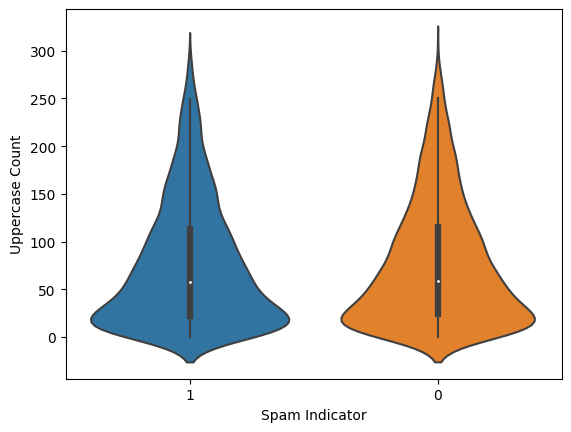

In [37]:
sns.violinplot(y ='Uppercase Count',data = df,x = 'Spam Indicator' )

In [38]:
for i in z :
    df[i] =  df[i].astype('int')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Subject            6000 non-null   object
 1   Sender             6000 non-null   object
 2   Attachments        6000 non-null   int64 
 3   Link Count         6000 non-null   int64 
 4   Word Count         6000 non-null   int64 
 5   Uppercase Count    6000 non-null   int64 
 6   Exclamation Count  6000 non-null   int64 
 7   Question Count     6000 non-null   int64 
 8   Dollar Count       6000 non-null   int64 
 9   Punctuation Count  6000 non-null   int64 
 10  HTML Tags Count    6000 non-null   int64 
 11  Spam Indicator     6000 non-null   int64 
 12  Month              6000 non-null   int64 
 13  date               6000 non-null   int64 
dtypes: int64(12), object(2)
memory usage: 656.4+ KB


**> **Converting subject to numeric vector ****

In [40]:
w = df['Subject']
w

0                            Even hotel community church.
1       Try themselves guess fight white agreement thu...
2       Environmental commercial off seem any conference.
3           Smile real TV father commercial day increase.
4                          Fast stage he oil institution.
                              ...                        
5995              Current team yet like realize American.
5996         Also start certainly range great try others.
5997                       Matter issue win agent likely.
5998                                 Again member father.
5999              Position recognize behind boy try able.
Name: Subject, Length: 6000, dtype: object

In [41]:
w[1]

'Try themselves guess fight white agreement thus although.'

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(use_idf=True, smooth_idf=True, ngram_range=(1, 1), stop_words='english')

# Transform the sentences into TF-IDF vectors
tfidf_data = tfidf_vec.fit_transform(w)

# Create a DataFrame to display the results
tfidf_dataframe = pd.DataFrame(tfidf_data.toarray(), columns=tfidf_vec.get_feature_names_out())

In [43]:
tfidf_data

<6000x763 sparse matrix of type '<class 'numpy.float64'>'
	with 25930 stored elements in Compressed Sparse Row format>

In [44]:
tfidf_dataframe.head()

,ability,able,accept,according,account,act,action,activity,actually,add,...,world,worry,write,writer,wrong,yard,yeah,year,yes,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
 #df1 = pd.concat([df,tfidf_dataframe],axis = 1)

> **create a new data (duplicate) to avoid overlap in data**

In [46]:
d  = tfidf_dataframe

In [47]:
a = d.columns
a

Index(['ability', 'able', 'accept', 'according', 'account', 'act', 'action',
       'activity', 'actually', 'add',
       ...
       'world', 'worry', 'write', 'writer', 'wrong', 'yard', 'yeah', 'year',
       'yes', 'young'],
      dtype='object', length=763)

In [48]:
for i in a:
    #print(max(d[i].value_counts(normalize = True)))
        
    if (max(d[i].value_counts(normalize = True)) > 0.993) :
        #print(d[i].value_counts(normalize = True))
        d.drop(i,axis = 1,inplace = True)

In [49]:
d.shape

(6000, 72)

In [50]:
tfidf_dataframe.shape

(6000, 72)

In [51]:
df1 = df

In [52]:
df1

,Subject,Sender,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator,Month,date
0,Even hotel community church.,emilyscott@example.org,3,0,191,32,3,3,0,11,1,1,2,13
1,Try themselves guess fight white agreement thu...,annwhite@example.net,3,9,45,1,2,1,2,8,2,1,8,9
2,Environmental commercial off seem any conference.,david88@example.net,3,9,52,1,4,0,2,10,1,1,5,16
3,Smile real TV father commercial day increase.,lindaalvarez@example.com,2,3,75,6,0,2,0,8,2,0,4,25
4,Fast stage he oil institution.,vstafford@example.com,3,5,299,279,0,2,0,6,1,1,7,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Current team yet like realize American.,martinezangela@example.net,1,7,114,83,0,3,2,0,5,0,4,10
5996,Also start certainly range great try others.,mckenzieerika@example.net,1,5,19,10,0,0,1,7,0,0,5,7
5997,Matter issue win agent likely.,dlewis@example.org,2,10,52,45,5,3,0,10,4,0,4,8
5998,Again member father.,eperry@example.org,3,2,178,76,0,1,2,11,1,1,1,19


In [53]:
df1.drop(['Subject','Sender'],axis = 1,inplace = True)

In [54]:
df2 = pd.concat([df1,d],axis = 1)

In [55]:
df2

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator,...,suggest,thing,today,town,traditional,try,want,way,western,wonder
0,3,0,191,32,3,3,0,11,1,1,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,3,9,45,1,2,1,2,8,2,1,...,0.0,0.0,0.0,0.0,0.0,0.436345,0.0,0.0,0.0,0.0
2,3,9,52,1,4,0,2,10,1,1,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,2,3,75,6,0,2,0,8,2,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,3,5,299,279,0,2,0,6,1,1,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,7,114,83,0,3,2,0,5,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5996,1,5,19,10,0,0,1,7,0,0,...,0.0,0.0,0.0,0.0,0.0,0.427914,0.0,0.0,0.0,0.0
5997,2,10,52,45,5,3,0,10,4,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5998,3,2,178,76,0,1,2,11,1,1,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [56]:
df2.shape

(6000, 84)

In [57]:
d.shape

(6000, 72)

In [58]:
df2

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator,...,suggest,thing,today,town,traditional,try,want,way,western,wonder
0,3,0,191,32,3,3,0,11,1,1,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,3,9,45,1,2,1,2,8,2,1,...,0.0,0.0,0.0,0.0,0.0,0.436345,0.0,0.0,0.0,0.0
2,3,9,52,1,4,0,2,10,1,1,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,2,3,75,6,0,2,0,8,2,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,3,5,299,279,0,2,0,6,1,1,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,7,114,83,0,3,2,0,5,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5996,1,5,19,10,0,0,1,7,0,0,...,0.0,0.0,0.0,0.0,0.0,0.427914,0.0,0.0,0.0,0.0
5997,2,10,52,45,5,3,0,10,4,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5998,3,2,178,76,0,1,2,11,1,1,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [59]:
X = df2.drop('Spam Indicator',axis = 1)
y = df2['Spam Indicator']

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 2)

In [61]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [62]:
log.score(X_train,y_train)*100

53.11111111111111

In [63]:
pred = log.predict(X_test)

In [64]:
log.score(X_test,y_test)*100

48.53333333333333

In [65]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, pred)
cm

array([[415, 331],
       [441, 313]])

# using word2vec

In [66]:
df = pd.read_csv('/kaggle/input/spam-email-dataset/spam_email_dataset.csv')
df.head(2)

,Email,Subject,Sender,Recipient,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,gregorysmith@example.org,13-02-2023,04:13,3,0,191,32,3,3,0,11,1,1
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,gonzalezdaniel@example.net,09-08-2023,06:15,3,9,45,1,2,1,2,8,2,1


In [67]:
# import contractions
# #contractions is the package in python used to expand the contractions in english language to their original form. Example: I'll to "I will"
import nltk
#nltk is a suite of libraries that are mainly used for dealing with problems related to Natural language processing.
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
#donwloadin the stopwords of english language
stopwords=stopwords.words('english')
#Removing stopwords 'no','nor' and 'not'
stopwords.remove('no')
stopwords.remove('nor')
stopwords.remove('not')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
processed_mails=[]
for i in (df['Subject']):
    #Regular expression that removes all the html tags pressent in the reviews
    i=re.sub('(<[\w\s]*/?>)',"",i)
    #Expanding all the contractions present in the review to is respective actual form
    #i=contractions.fix(i)
    #Removing all the special charactesrs from the review text
    i=re.sub('[^a-zA-Z0-9\s]+',"",i)
    #Removing all the digits present in the review text
    i=re.sub('\d+',"",i)
    #Making all the review text to be of lower case as well as removing the stopwords and words of length less than 3
    processed_mails.append(" ".join([j.lower() for j in i.split() if j not in stopwords and len(j)>=3]))

In [69]:
print('without tokenization','\n')
print(w[2])


print('\n''\n','after tokenization','\n''\n')
processed_mails[2]

without tokenization 

Environmental commercial off seem any conference.


 after tokenization 




'environmental commercial seem conference'

**> **Tokenized data****

In [70]:
df_1=pd.DataFrame({'Subject':processed_mails},)
df_1.head()

,Subject
0,even hotel community church
1,try guess fight white agreement thus although
2,environmental commercial seem conference
3,smile real father commercial day increase
4,fast stage oil institution


In [71]:
import pandas as pd
from gensim.models import Word2Vec


df_1['Subject'] = df_1['Subject'].apply(lambda text: text.split())  # Tokenization, assumes space-separated words
model = Word2Vec(df_1['Subject'], vector_size=100, window=5, min_count=1, sg=0)   #  CBOW method


# Function to convert a list of words to a sentence vector using Word2Vec

def sentence_to_vector(sentence, model):
    word_vectors = [model.wv[word] for word in sentence if word in model.wv]
    if not word_vectors:
        return None
    return sum(word_vectors) / len(word_vectors)

# Apply the 'sentence_to_vector' function to create a new column with sentence vectors
df_1['Subject'] = df_1['Subject'].apply(lambda x: sentence_to_vector(x, model))


In [72]:
len(df_1['Subject'][0])

100

In [73]:
df_1['Subject']

0       [-0.114126846, 0.12402053, 0.083368935, 0.0366...
1       [-0.14724098, 0.15384735, 0.102760196, 0.04669...
2       [-0.12432119, 0.13347428, 0.08706878, 0.034122...
3       [-0.12934701, 0.13817549, 0.091731876, 0.04032...
4       [-0.12595664, 0.13412419, 0.09229582, 0.040332...
                              ...                        
5995    [-0.14030953, 0.1505387, 0.093797624, 0.042145...
5996    [-0.1357399, 0.14579506, 0.09718329, 0.0413123...
5997    [-0.14523654, 0.15618135, 0.09750594, 0.041986...
5998    [-0.0876396, 0.087360494, 0.062925816, 0.02503...
5999    [-0.14480375, 0.15466112, 0.09903016, 0.042521...
Name: Subject, Length: 6000, dtype: object

In [74]:
df_1

,Subject
0,"[-0.114126846, 0.12402053, 0.083368935, 0.0366..."
1,"[-0.14724098, 0.15384735, 0.102760196, 0.04669..."
2,"[-0.12432119, 0.13347428, 0.08706878, 0.034122..."
3,"[-0.12934701, 0.13817549, 0.091731876, 0.04032..."
4,"[-0.12595664, 0.13412419, 0.09229582, 0.040332..."
...,...
5995,"[-0.14030953, 0.1505387, 0.093797624, 0.042145..."
5996,"[-0.1357399, 0.14579506, 0.09718329, 0.0413123..."
5997,"[-0.14523654, 0.15618135, 0.09750594, 0.041986..."
5998,"[-0.0876396, 0.087360494, 0.062925816, 0.02503..."


> **converting subject column to individual columns**

In [75]:
# define a function to split the list into columns
def split_list(row):
    return pd.Series(row['Subject'])

# apply the function to the DataFrame
new_df = df_1.apply(split_list, axis=1).rename(columns=lambda x: f"word_embd{x+1}")

# merge the new DataFrame with the original DataFrame
result_df = pd.concat([df_1, new_df], axis=1).drop('Subject', axis=1)

In [76]:
result_df.head()

,word_embd1,word_embd2,word_embd3,word_embd4,word_embd5,word_embd6,word_embd7,word_embd8,word_embd9,word_embd10,...,word_embd91,word_embd92,word_embd93,word_embd94,word_embd95,word_embd96,word_embd97,word_embd98,word_embd99,word_embd100
0,-0.114127,0.124021,0.083369,0.036604,0.049756,-0.248114,-0.100548,0.267847,-0.045032,0.021106,...,0.096423,-0.019065,-0.045890,-0.045267,0.172792,0.216901,0.117153,-0.270527,0.116663,0.013846
1,-0.147241,0.153847,0.102760,0.046696,0.063776,-0.304893,-0.124898,0.339190,-0.051472,0.031755,...,0.119615,-0.016585,-0.063109,-0.052814,0.218529,0.267444,0.145444,-0.331372,0.145474,0.020428
2,-0.124321,0.133474,0.087069,0.034122,0.058467,-0.268757,-0.112331,0.296505,-0.044004,0.020851,...,0.102404,-0.019609,-0.048995,-0.047884,0.194819,0.240549,0.122888,-0.295701,0.133466,0.024850
3,-0.129347,0.138175,0.091732,0.040330,0.058192,-0.275335,-0.120928,0.304594,-0.043079,0.027096,...,0.107906,-0.019989,-0.056005,-0.044948,0.194784,0.243371,0.125679,-0.300108,0.131054,0.017979
4,-0.125957,0.134124,0.092296,0.040332,0.061540,-0.262125,-0.116277,0.293524,-0.046250,0.027323,...,0.107701,-0.017496,-0.056957,-0.045794,0.187642,0.243975,0.119535,-0.289327,0.121270,0.017045


In [77]:
s = df
s.head()

,Email,Subject,Sender,Recipient,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,gregorysmith@example.org,13-02-2023,04:13,3,0,191,32,3,3,0,11,1,1
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,gonzalezdaniel@example.net,09-08-2023,06:15,3,9,45,1,2,1,2,8,2,1
2,jill43@example.com,Environmental commercial off seem any conference.,david88@example.net,michellebaker@example.net,16-05-2023,01:32,3,9,52,1,4,0,2,10,1,1
3,johnsonkaren@example.org,Smile real TV father commercial day increase.,lindaalvarez@example.com,schroedertodd@example.com,25-04-2023,14:50,2,3,75,6,0,2,0,8,2,0
4,markwilson@example.org,Fast stage he oil institution.,vstafford@example.com,emilywilliams@example.com,11-07-2023,21:44,3,5,299,279,0,2,0,6,1,1


In [78]:
s.drop(['Sender','Email','Recipient'],axis = 1,inplace = True)

In [79]:
s['Date'] = pd.to_datetime(s['Date'])

# accessing the month from the date column
s['Month'] = s['Date'].dt.month

# accessing the year from the date column

s['date'] = s['Date'].dt.day

In [80]:
s = s.drop(['Time','Date','Subject'],axis = 1)

In [81]:
s

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator,Month,date
0,3,0,191,32,3,3,0,11,1,1,2,13
1,3,9,45,1,2,1,2,8,2,1,8,9
2,3,9,52,1,4,0,2,10,1,1,5,16
3,2,3,75,6,0,2,0,8,2,0,4,25
4,3,5,299,279,0,2,0,6,1,1,7,11
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,7,114,83,0,3,2,0,5,0,4,10
5996,1,5,19,10,0,0,1,7,0,0,5,7
5997,2,10,52,45,5,3,0,10,4,0,4,8
5998,3,2,178,76,0,1,2,11,1,1,1,19


In [82]:
s = pd.concat([s,result_df],axis = 1)
s

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator,...,word_embd91,word_embd92,word_embd93,word_embd94,word_embd95,word_embd96,word_embd97,word_embd98,word_embd99,word_embd100
0,3,0,191,32,3,3,0,11,1,1,...,0.096423,-0.019065,-0.045890,-0.045267,0.172792,0.216901,0.117153,-0.270527,0.116663,0.013846
1,3,9,45,1,2,1,2,8,2,1,...,0.119615,-0.016585,-0.063109,-0.052814,0.218529,0.267444,0.145444,-0.331372,0.145474,0.020428
2,3,9,52,1,4,0,2,10,1,1,...,0.102404,-0.019609,-0.048995,-0.047884,0.194819,0.240549,0.122888,-0.295701,0.133466,0.024850
3,2,3,75,6,0,2,0,8,2,0,...,0.107906,-0.019989,-0.056005,-0.044948,0.194784,0.243371,0.125679,-0.300108,0.131054,0.017979
4,3,5,299,279,0,2,0,6,1,1,...,0.107701,-0.017496,-0.056957,-0.045794,0.187642,0.243975,0.119535,-0.289327,0.121270,0.017045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,7,114,83,0,3,2,0,5,0,...,0.114354,-0.019981,-0.057858,-0.049893,0.212476,0.258307,0.137682,-0.321650,0.133152,0.018473
5996,1,5,19,10,0,0,1,7,0,0,...,0.114933,-0.019503,-0.057773,-0.045261,0.203949,0.256139,0.135150,-0.307904,0.131626,0.019215
5997,2,10,52,45,5,3,0,10,4,0,...,0.120842,-0.017044,-0.065351,-0.055208,0.216737,0.277439,0.140653,-0.334649,0.146658,0.019712
5998,3,2,178,76,0,1,2,11,1,1,...,0.070882,-0.012330,-0.038507,-0.026567,0.125336,0.161282,0.080636,-0.194492,0.081361,0.009901


In [83]:
X = s.drop('Spam Indicator',axis = 1)
y = s['Spam Indicator']

In [84]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 111 entries, Attachments to word_embd100
dtypes: float32(100), int32(2), int64(9)
memory usage: 2.7 MB


In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 2)


In [86]:
from sklearn.preprocessing import RobustScaler


rrs =RobustScaler()
X_train= rrs.fit_transform(X_train)
X_test = rrs.transform(X_test)

In [87]:
y_train

3240    0
84      0
222     1
1559    0
5789    1
       ..
1099    1
2514    1
3606    0
5704    0
2575    1
Name: Spam Indicator, Length: 4500, dtype: int64

In [88]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [89]:
log.score(X_train,y_train)*100

56.666666666666664

In [90]:
pred = log.predict(X_test)

In [91]:
log.score(X_test,y_test)*100

46.86666666666667

In [92]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, pred)
cm

array([[381, 365],
       [432, 322]])